<a href="https://colab.research.google.com/github/ppsousa/ppsousa_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

## Análise dos Dados


Esta etapa permite um entendimento de como os dados estáo estruturados.

**Dicionário das variáveis**

* `id` - número do id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número do id do proprietario (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - valor inválido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - minimo de noites para reserva
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* ``







Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Identificaremos a quantidade de entradas do conjunto de dados e os tipos de cada coluna.

Este *dataset* é uma versão resumida do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` existe uma versão completa com 35870 entradas e 106 variáveis (`listings.csv.gz`)

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 35870
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade do dataset está diretamente relacionada a quantidade de valores ausentes. É importante entender que esses valores nulos são significativos comparados ao total de entradas

* É possível ver que a coluna `neighbourhoood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.

* As variáveis `name` e `host_name` têm aproximadamente 0.1% dos valores nulos.





In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Através do histograma ficará melhor identificar a distribuição das variáveis.

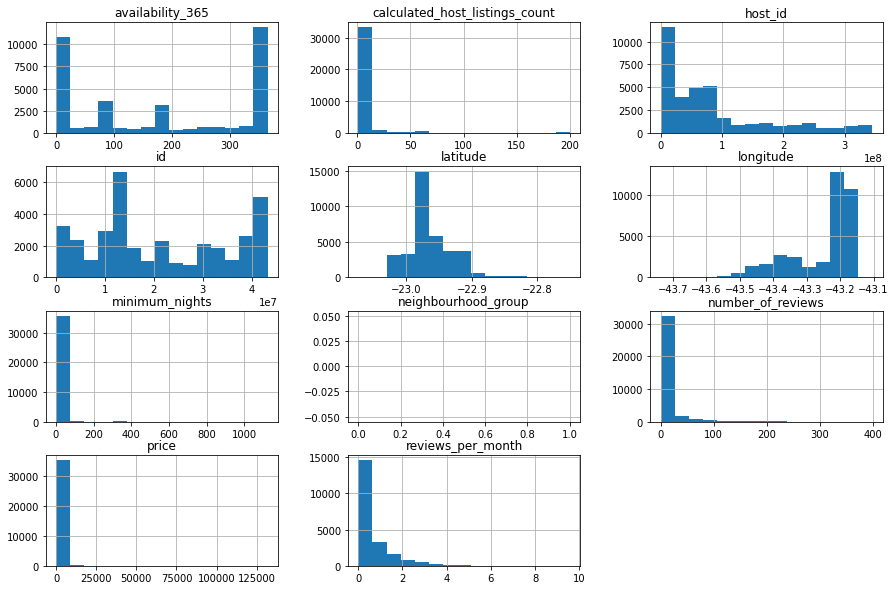

In [37]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [43]:
# mostrar a porcentagem de cada tipo de imóvel disponível
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# ver a média da coluna `price``
print('Média de Preços:',df_clean.price.mean());

Média de Preços: 373.56805521168604


### **Q4. Qual a correlação existente entre as variáveis**

Aqui é apresentado a relação ou semelhança entre duas variáveis.

Esta relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, apresento uma matriz de correlação e um *heatmap* a partir dessa matris usando a biblioteca `seaborn`.

In [14]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.021168,-0.074957,-0.066614,0.192672,-0.018865
minimum_nights,0.021168,1.000000,-0.017885,-0.028043,-0.010478,0.009960
number_of_reviews,-0.074957,-0.017885,1.000000,0.646495,-0.037390,0.050538
reviews_per_month,-0.066614,-0.028043,0.646495,1.000000,-0.019711,-0.021503
calculated_host_listings_count,0.192672,-0.010478,-0.037390,-0.019711,1.000000,0.062216
availability_365,-0.018865,0.009960,0.050538,-0.021503,0.062216,1.000000


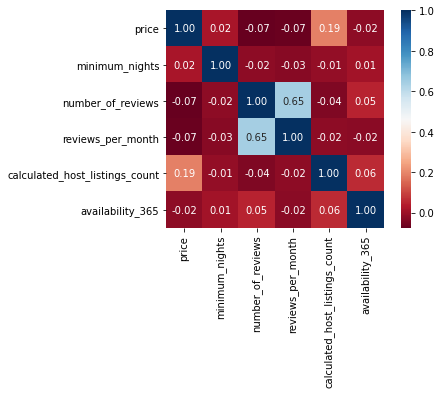

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Atravéz da variável `room_type` podemos apresentar o tipo de locação que está anunciada.
Será apresentado a quantidade de ocorrências de cata tipo de imóvel usando o método `values_counts()`.

In [44]:
#quantidade de tipos de quartos.
print('Tipos de Quartos: ',df_clean.room_type.value_counts());

Tipos de Quartos:  Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64


### **Q6. Qual a localidade mais cara do dataset?**



In [20]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

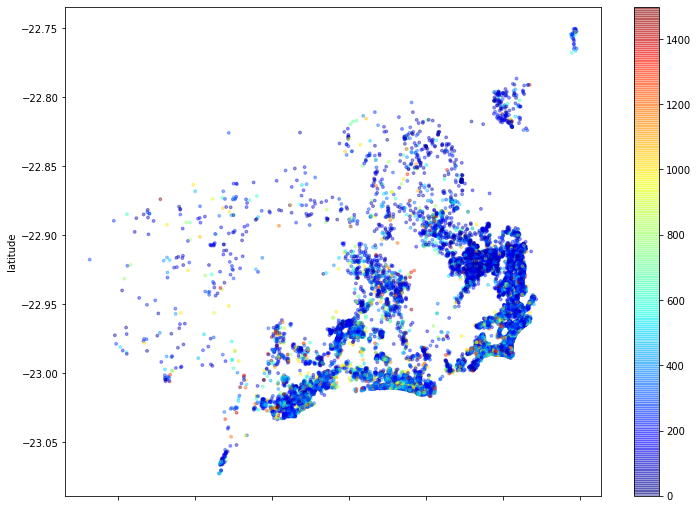

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude',y='latitude',alpha=0.4,c=df_clean['price'], s=8,cmap=plt.get_cmap('jet'), figsize=(12,9));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Os proprietários disponibilizam a locação a partir de uma quantidade mínima de noites que o hospede pretente ficar porque somente faz sentido para ele se a pessoa ficar por um período maior de tempo.


In [31]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()


3.4390009903441445

## Conclusões


Esta é apenas uma análise superficial nos dados da Airbnb da cidade do Rio de Janeiro. O *dataset* analisado é uma versão resumida, utilizado apenas para fins didáticos. Sempre é melhor utilizar um conjunto de dados mais completos para uma análise mais profunda.